## Cryptocurrency clusters


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np

In [119]:
# Read crypto_data.csv into Pandas. 
df = pd.read_csv('crypto_data.csv', index_col =0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [120]:
# Keep only cryptocurrencies that are trading
df = df.loc[df['IsTrading'] == True]

In [121]:
# drop the IsTrading column from the dataframe.
df.drop('IsTrading', axis=1, inplace=True)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [122]:
# Remove all rows that have at least one null value.
df = df.dropna(how='any',axis=0)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [123]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
# mined_df = df.query('TotalCoinsMined > 0')
df = df.loc[df.TotalCoinsMined > 0]
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [124]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from df 
coinname_df = pd.DataFrame(df.CoinName)
coinname_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [125]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
df = df.drop(columns = 'CoinName')
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [126]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
category_columns = ['Algorithm','ProofType']
get_dummies_df = pd.get_dummies(df, columns = category_columns)
# df = df.reindex(labels=df.columns,axis=1)
get_dummies_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
# Scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(get_dummies_df)
scaled_data


array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

# Dimensionality Reduction

In [128]:
# Perform dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components data
# pca_df = pd.DataFrame(
#     data=pca_data, columns=["PC 1", "PC 2", "PC 3"]
# )
# pca_df.head()
# pca_data

In [129]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [133]:
print(pca_data.shape)

(532, 74)


In [60]:
# reduce the dataset dimensions with t-SNE and visually inspect the results.

In [135]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(perplexity=50, learning_rate=100)    

# Reduce dimensions
tsne_features = tsne.fit_transform(pca_data)
tsne_features.shape

(532, 2)

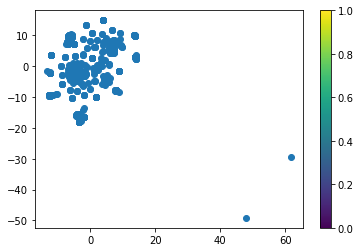

In [136]:
plt.scatter(tsne_features[:,0],tsne_features[:,1])
plt.colorbar()
plt.show()

## Cluster Analysis with k-Means

#### Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

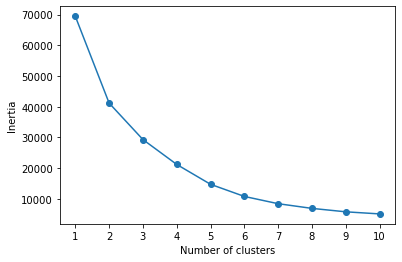

In [139]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'], marker = "o")
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [140]:
tsne_features = pd.DataFrame(tsne_features)
tsne_features.head()

,0,1
0,7.012730,4.250910
1,7.265440,8.337564
2,14.127055,3.470231
3,-3.498580,-15.903891
4,1.717897,-10.140881


In [141]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [142]:
clusters = get_clusters(4, tsne_features)
clusters


,0,1,class
0,7.012730,4.250910,2
1,7.265440,8.337564,2
2,14.127055,3.470231,2
3,-3.498580,-15.903891,0
4,1.717897,-10.140881,0
...,...,...,...
527,-2.122688,-14.075018,0
528,6.557423,6.294450,2
529,-12.486605,-9.642662,0
530,-12.395194,-2.151241,1


In [149]:
plot_df = pd.DataFrame(data=clusters)

plot_df.head()

,0,1,class
0,7.012730,4.250910,2
1,7.265440,8.337564,2
2,14.127055,3.470231,2
3,-3.498580,-15.903891,0
4,1.717897,-10.140881,0


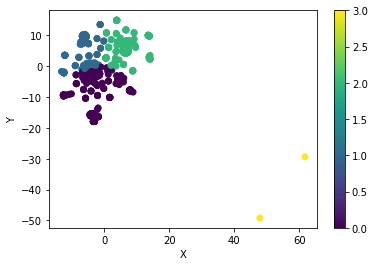

In [153]:
plt.scatter(plot_df[0],plot_df[1],c=plot_df['class'])
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()